In [2]:
import av
import cv2
import mediapipe as mp
import numpy as np
from matplotlib import pyplot as plt

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

mdc = 0.5
mtc = 0.5

In [4]:
def track_hands_in_videos(image, min_detection_confidence=mdc, min_tracking_confidence=mtc):
    with mp_hands.Hands(
        max_num_hands=1,
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence,
        static_image_mode=False,
    ) as hands:
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        blank_annotated_image = np.zeros(image.shape, np.uint8)
        blank_annotated_image[:, :, :] = (255, 255, 255)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(blank_annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    return blank_annotated_image

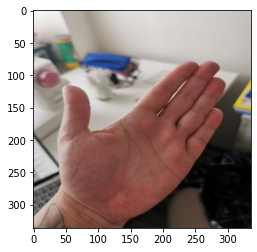

In [5]:
paper1 = cv2.imread("./pictures/paper/12.jpg")
paper2 = cv2.cvtColor(paper1, cv2.COLOR_BGR2RGB)
plt.imshow(paper2)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


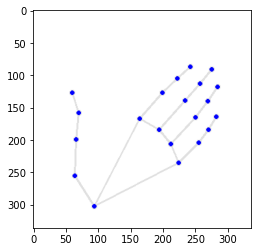

In [6]:
annotated_image = track_hands_in_videos(paper1)
plt.imshow(annotated_image)

In [7]:
# Extract HAND LANDMARKS from picture

hands = mp_hands.Hands(
        max_num_hands=1,
        min_detection_confidence=mdc,
        min_tracking_confidence=mtc,
        static_image_mode=True,
        )
result = hands.process(cv2.cvtColor(paper1, cv2.COLOR_BGR2RGB))


In [8]:
result.multi_handedness

[classification {
   index: 1
   score: 0.8879953026771545
   label: "Right"
 }]

In [9]:
result.multi_hand_landmarks

[landmark {
   x: 0.2815955579280853
   y: 0.9012502431869507
   z: 8.053282840592146e-07
 }
 landmark {
   x: 0.19138765335083008
   y: 0.7592764496803284
   z: -0.04463335871696472
 }
 landmark {
   x: 0.19660165905952454
   y: 0.5951149463653564
   z: -0.0627821832895279
 }
 landmark {
   x: 0.2088979184627533
   y: 0.47315359115600586
   z: -0.08018460869789124
 }
 landmark {
   x: 0.18126973509788513
   y: 0.38017737865448
   z: -0.09580410271883011
 }
 landmark {
   x: 0.49010080099105835
   y: 0.498484343290329
   z: 0.016494590789079666
 }
 landmark {
   x: 0.5933727622032166
   y: 0.3791278600692749
   z: 0.003280653851106763
 }
 landmark {
   x: 0.6620910167694092
   y: 0.314044713973999
   z: -0.026082385331392288
 }
 landmark {
   x: 0.7209081649780273
   y: 0.2602609395980835
   z: -0.05151812359690666
 }
 landmark {
   x: 0.5778863430023193
   y: 0.547766923904419
   z: 0.009827232919633389
 }
 landmark {
   x: 0.6968687176704407
   y: 0.4137980043888092
   z: 0.013307199

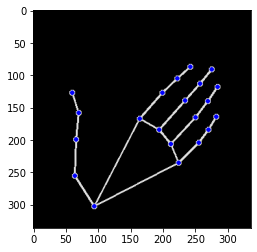

In [10]:
blank_annotated_image = np.zeros(paper1.shape, np.uint8) 

mp_drawing.draw_landmarks(blank_annotated_image, result.multi_hand_landmarks[0], mp_hands.HAND_CONNECTIONS)
plt.imshow(blank_annotated_image)

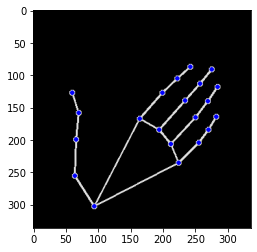

In [13]:
plt.imshow(blank_annotated_image)